<a href="https://colab.research.google.com/github/rahulbhoyar1995/Large-Language-Models-with-Python/blob/main/openai_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!ls -a


.  ..  .config	.env  sample_data


In [4]:
pip install openai python-dotenv


In [5]:
from dotenv import load_dotenv

load_dotenv()

True

### Image Generation

In [14]:
from openai import OpenAI
import openai
from PIL import Image
from io import BytesIO
import IPython.display as display
import base64
import os
import requests

client = OpenAI()

In [6]:
from openai import OpenAI
client = OpenAI()

response = client.images.generate(
  model="dall-e-3",
  prompt="a white siamese cat",
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = response.data[0].url

In [7]:
image_url

'https://oaidalleapiprodscus.blob.core.windows.net/private/org-8hN792CgG6jB4SRKVYyjNajY/user-eozoB7W90F9JOxqyHMxjI98u/img-R90pwK0zlt9f5rdqu8WM9VRz.png?st=2024-05-20T14%3A35%3A32Z&se=2024-05-20T16%3A35%3A32Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-05-19T17%3A18%3A04Z&ske=2024-05-20T17%3A18%3A04Z&sks=b&skv=2021-08-06&sig=a8NeZ895bJoa/Vo54AGjMAKcngaeIihZ4uZI0kmvYPs%3D'

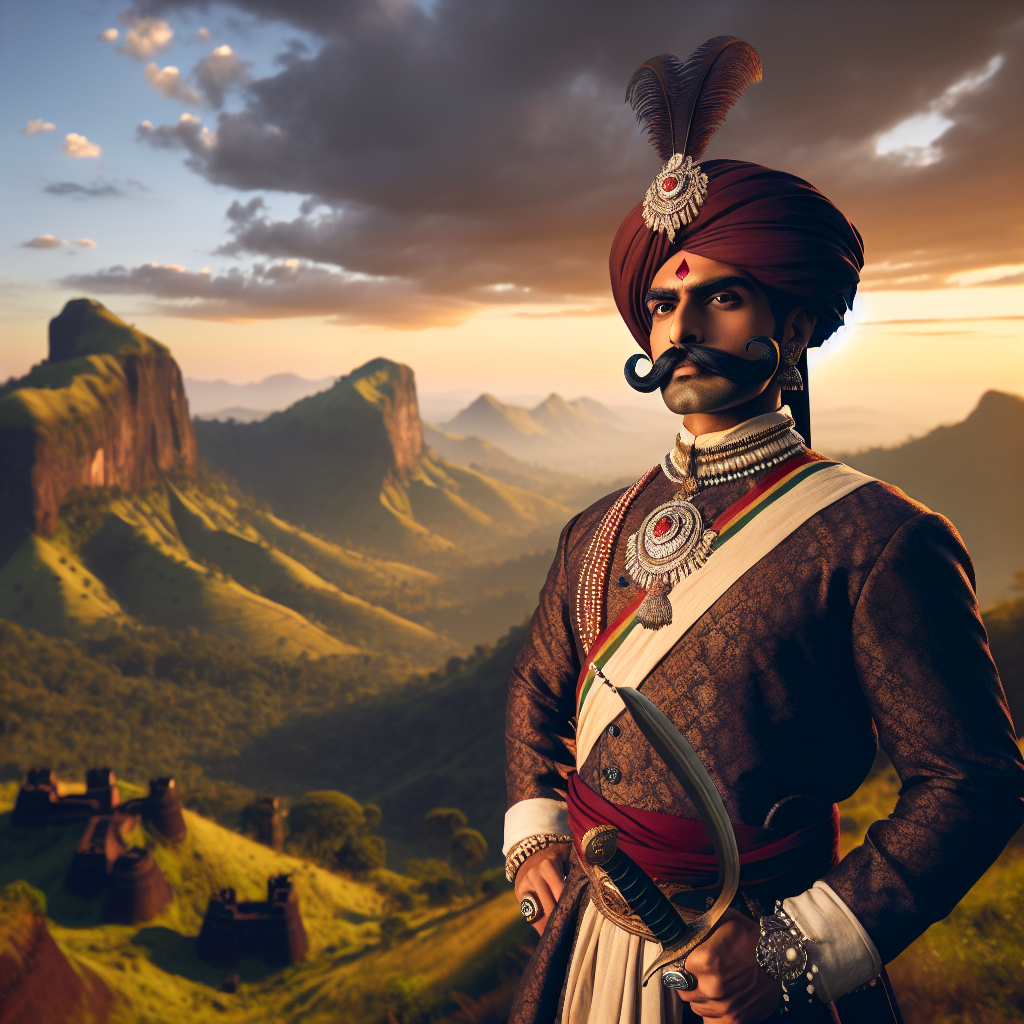

In [16]:
def generate_image(prompt):
    # Generate the image using OpenAI API
    response = client.images.generate(
        model="dall-e-3",
        prompt=prompt,
        size="1024x1024",
        n=1
    )

    # Extract the image data from the response
    image_data = response.data[0].url

    # Optionally, download the image data and save it to a file
    image_response = requests.get(image_data)
    image = Image.open(BytesIO(image_response.content))
    image.save(f"{prompt}.png")
    return image

# Example usage
generate_image("Shivaji Maharaj in Sahyadri Mountains")


### Vision

In [22]:
response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "What’s in this image?"},
        {
          "type": "image_url",
          "image_url": {
            "url": "https://as1.ftcdn.net/v2/jpg/03/11/95/50/1000_F_311955061_fPUCE34v8HhkEsgBDXA2z5XX6cna6ioc.jpg",
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The image depicts a scenic view of mountainous terrain covered with lush green vegetation. The landscape is characterized by steep cliffs, rugged hillsides, and a dense cover of greenery, likely taken during a season with substantial rainfall or in a rain-rich area. There are patches of mist or clouds partially covering some of the mountain peaks, adding a sense of height and depth to the scene. The overall atmosphere suggests a remote and natural environment, possibly part of a wilderness area or a national park.', role='assistant', function_call=None, tool_calls=None))


### Text-to-Speech

In [29]:
response = client.audio.speech.create(
    model="tts-1",
    voice="alloy",
    input="""Considering the scale and complexity of these datasets, I plan to invest in a GPU workstation or utilize cloud computing services to efficiently run experiments. Furthermore, I aspire to develop a runnable prototype or deploy a demo to validate my findings. I also intend to submit our research to reputable conferences and journals to contribute to the wider community.

I understand that you may have numerous demands on your time, but I would be immensely grateful for the opportunity to discuss potential thesis topics and explore how my research interests could complement your ongoing work. Your mentorship would be instrumental in shaping my academic and professional trajectory, and I am fully committed to making the most of this opportunity."""
)

response.stream_to_file("english_output.mp3")

<ipython-input-29-13e2ebcda24e>:9: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file("english_output.mp3")


In [28]:
response = client.audio.speech.create(
    model="tts-1",
    voice="alloy",
    input="""मला आशा आहे की आपण स्वस्थ आहात. माझं नाव नरसिंह कृष्ण आहे, आणि मी सध्या माझं दुसरं मास्टर डिग्री आर्टिफिशियल इंटेलिजन्स मध्ये करत आहे, ज्याचं लक्ष डेटा सायन्स आणि इंजिनियरिंगवर आहे. एआयमध्ये आपल्या वरच्या संशोधक म्हणून असलेल्या उत्कृष्ट पार्श्वभूमीने मला खूप प्रेरणा दिली आहे, आणि मी आपल्याला विनंती करतो की माझं मास्टर थिसिस आपल्या पर्यवेक्षणाखाली करण्याच्या संधीबद्दल आपली सहमती मागतो.

मला डेटा सायन्स आणि इंजिनियरिंग क्षेत्राबद्दल खूप आवड आहे, आणि मी या क्षेत्रातील ज्ञानाच्या काठावर जाणून संकल्पित संशोधनात योगदान देण्यासाठी वचनबद्ध आहे. आपल्या तंत्रज्ञान आणि अनुभवांच्या आधारावर, मला विश्वास आहे की आपल्या সহযোগितेमुळे मला अमूल्य मार्गदर्शन आणि मेंटरशिप मिळेल ज्यामुळे माझ्या कौशल्यांना सुधारण्यासाठी आणि क्षेत्रातील कठीण समस्यांना सामोरे जाण्यासाठी मदत होईल.""",
)

response.stream_to_file("marathi_output.mp3")

<ipython-input-28-199f69d401cf>:13: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file("marathi_output.mp3")


### Speech to Text

In [31]:
from openai import OpenAI
client = OpenAI()

audio_file= open("english_output.mp3", "rb")
transcription = client.audio.transcriptions.create(
  model="whisper-1",
  file=audio_file
)
print(transcription.text)

Considering the scale and complexity of these datasets, I plan to invest in a GPU workstation or utilize cloud computing services to efficiently run experiments. Furthermore, I aspire to develop a runnable prototype or deploy a demo to validate my findings. I also intend to submit our research to reputable conferences and journals to contribute to the wider community. I understand that you may have numerous demands on your time, but I would be immensely grateful for the opportunity to discuss potential thesis topics and explore how my research interests could complement your ongoing work. Your mentorship would be instrumental in shaping my academic and professional trajectory, and I am fully committed to making the most of this opportunity.


In [30]:
from openai import OpenAI
client = OpenAI()

audio_file= open("marathi_output.mp3", "rb")
transcription = client.audio.transcriptions.create(
  model="whisper-1",
  file=audio_file
)
print(transcription.text)

मला आशा आहे की आपन स्वस्थ थाहत। माझे नाव नर्सिंग कृष्णा है और मी सत्या माझे दूसर मास्टर डिग्री अर्टिफिशिल इंटेलिजन्स मत्य करता है। जियाचन लक्ष डेटा सायंस और इंजिनियरिंग वरा है। AI मत्य आपलिया वर्च्य संशोधक महनुन असलिया उत्कृष्ट पार्श्व भुमीने मला कुब प्रेर्णा दिलिया है। आणि मी आपलियाला विनन्ती करतो की माझे मास्टर थिसिस आपलिया पर्यवेक्षन खाली करन्याचा संधी बदल आपली सहमती मागतो। मला डेटा सायंस आणि इंजिनियरिंग क्षेतरा बदल खूब आवडा है आणि मी या क्षेतरा तील जानाच्या काठावर जानुन संकलपित संशोधनात योगदान देना साथी वचन बद्धा है। आपल्या तंत्रणान आणि अनुभवान चे आधारावर, मला विश्वास है कि आपल्या सहागते मुरे मला अमूले मार्गदर्शन आणि मेंटरशिप मिरेल, जिया मुरे माझ्या कौशल्यानना सुधारन्या साथी आणि क्षेतरा तील कठीन समस्याना सामूरे जान्या स


Translations into English

In [32]:
audio_file= open("marathi_output.mp3", "rb")
translation = client.audio.translations.create(
  model="whisper-1",
  file=audio_file
)
print(translation.text)

I hope you are well. My name is Narsingha Krishna, and I am currently pursuing my second master's degree in Artificial Intelligence, with a focus on data science and engineering. AI has inspired me a lot as a researcher in my field, and I would like to request you to agree to my master's thesis in exchange for your free interview. I love the field of data science and engineering, and I am committed to contributing to the research and development of this field. Based on my knowledge and experience, I am confident that with your help, I will find valuable guidance and mentorship that will help me improve my skills and overcome the difficult problems in the field.
